# 00. Table of Contents

01. Notebook Setup

- Import libraries
- Import dataset as dataframe

02. Data Exploration and Profiling

- Data Quality and Consistency Checks
- Descriptive Analysis
- Observations from Exploration

03. Data Cleaning

- Unnecessary columns/variables
- Missing data
- Duplicates
- Inaccurate/inconsistent data
- Mixed-type columns
- Outliers
- Unclear column headers
- Data Profiling Re-checks

04. Data Transformation

- New columns / calculations
- Joining or merging tables
- Data Profiling Re-checks

05. Export Dataframe

# 01. Notebook Setup

## 01.01 Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns


In [2]:
# Create quick path to project folder

projpath = r'/Users/laineyodette/Documents/_proDocs/professional development/Learning/Learning - Data Analytics/CareerFoundry - Become a Data Analyst/Data Immersion Course/A6 - Advanced Analytics and Dashboard Design/Book Project'


## 01.02 Import dataset as dataframe

In [3]:
# Import USERS dataset as dataframe

df_Users = pd.read_csv(os.path.join(projpath, '02 Data', 'Dataset ORIGINAL', 'Users.csv'), index_col = False)


# 02. Data Exploration and Profiling

## 02.01 Data Quality and Consistency Checks

In [4]:
# Check dimensions of df

df_Users.shape

(278858, 3)

In [5]:
# Check output - view current column headers and preview

df_Users.head(25)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [6]:
# Check output - view current column headers and preview

df_Users.tail(25)

,User-ID,Location,Age
278833,278834,"essen, england, germany",NaN
278834,278835,"karachi, sindh, pakistan",18.0
278835,278836,"des moines, washington, usa",47.0
278836,278837,"taiyuan, shanxi, china",NaN
278837,278838,"massillon, ohio, usa",15.0
278838,278839,"austin, texas, usa",NaN
278839,278840,"encinitas, california, usa",45.0
278840,278841,"llangollen, denbighshire county, united kingdom.",NaN
278841,278842,"perth, western australia, australia",NaN
278842,278843,"pismo beach, california, usa",28.0


In [7]:
# Check data types for each column and non-null values

df_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [8]:
# Check for mixed data types

for col in df_Users.columns.tolist():
  weird = (df_Users[[col]].map(type) != df_Users[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_Users[weird]) > 0:
    print (col)

In [9]:
# Find missing values by summing the number of null values in each column

df_Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
# Find any duplicate values in df through a subset

df_dups = df_Users[df_Users.duplicated()]
df_dups

,User-ID,Location,Age


## 02.02 Descriptive Analysis

In [11]:
# Check output stats

df_Users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


## 02.03 Observations from Exploration and Analysis

These are my observations

- Unnecessary columns/variables: Location column needs to be split out to isolate country (other location pieces will not be needed) and country will need to be cleaned up (capitalization, consistency)
- Missing data: large quantity of missing values (NaN) in Age column (40% of records)
- Duplicates: N/A
- Inaccurate/inconsistent data: some locations are incomplete - see what this looks like after country isolation
- Data types including mixed-type columns: N/A all okay
- Outliers: Max on age is 244 which is obviously impossible, min on age is "0" which is also impossible.
- Unclear column headers: N/A

# 03. Data Cleaning

## 03.01 Unnecessary columns/variables

In [12]:
# To isolate country information, first need to separate out data into columns for the location to identify where the information is actually missing.

df_Users[['City','State or Region','Country']] = df_Users['Location'].str.split(', ', n=2, expand=True)
df_Users.head(25)

,User-ID,Location,Age,City,State or Region,Country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
5,6,"santa monica, california, usa",61.0,santa monica,california,usa
6,7,"washington, dc, usa",NaN,washington,dc,usa
7,8,"timmins, ontario, canada",NaN,timmins,ontario,canada
8,9,"germantown, tennessee, usa",NaN,germantown,tennessee,usa
9,10,"albacete, wisconsin, spain",26.0,albacete,wisconsin,spain


In [13]:
# Remove "City" and "State or Region" as will not be used in analysis

# List of columns to keep
columns2use = ['User-ID', 'Age', 'Location', 'Country']

# Create a subset DataFrame with only the specified columns
df_subset = df_Users[columns2use]

# Print the resulting DataFrame to verify
print(df_subset.head())

   User-ID   Age                            Location         Country
0        1   NaN                  nyc, new york, usa             usa
1        2  18.0           stockton, california, usa             usa
2        3   NaN     moscow, yukon territory, russia          russia
3        4  17.0           porto, v.n.gaia, portugal        portugal
4        5   NaN  farnborough, hants, united kingdom  united kingdom


In [14]:
# Replace df_Users with subset
df_Users = df_subset

# Print the resulting DataFrame to verify
print(df_Users.head())

   User-ID   Age                            Location         Country
0        1   NaN                  nyc, new york, usa             usa
1        2  18.0           stockton, california, usa             usa
2        3   NaN     moscow, yukon territory, russia          russia
3        4  17.0           porto, v.n.gaia, portugal        portugal
4        5   NaN  farnborough, hants, united kingdom  united kingdom


## 03.02 Missing data 

In [15]:
# Impute values where no age information is available or the value = "0" (40% of USERS data - too many to use median or to delete)

# Define the function for random sample imputation
def random_sample_imputation(df, column_name):
    # Extract the non-missing and non-zero values of the column
    non_missing_values = df[df[column_name] != 0][column_name].dropna().values
    # Identify the indices where the values are missing or zero
    missing_or_zero_indices = df[(df[column_name].isna()) | (df[column_name] == 0)].index
    # Get the number of missing or zero values
    num_missing_or_zero = len(missing_or_zero_indices)
    # Generate random samples from the non-missing values
    random_samples = np.random.choice(non_missing_values, num_missing_or_zero, replace=True)
    # Fill the missing or zero values with the random samples
    df.loc[missing_or_zero_indices, column_name] = random_samples

# Example usage with your dataframe
random_sample_imputation(df_Users, 'Age')

# Check if the missing and zero values have been imputed
print(df_Users['Age'].isna().sum())
print((df_Users['Age'] == 0).sum())

0
0


In [16]:
# Remove lines where no country information is available (only 2% of USERS data)

df_Users.dropna(subset = ['Country'], inplace = True)
df_Users.isnull().sum()

User-ID     0
Age         0
Location    0
Country     0
dtype: int64

In [17]:
# Recheck dimensions of df

df_Users.shape

(274281, 4)

## 03.03 Duplicates

In [18]:
# No action needed

## 03.04 Inaccurate/inconsistent data

In [19]:
# Investigate Country for cleanup steps

# View counts of each individual value in the Country column

df_Users['Country'].value_counts()

Country
usa                          139421
canada                        21601
united kingdom                18314
germany                       17024
spain                         13096
                              ...  
sao tome and principe"            1
-                                 1
hubei province, hong kong         1
portugal, portugal                1
united kingdom.                   1
Name: count, Length: 1130, dtype: int64

**Observed** Some odd countries and bad characters found such as periods and dashes and quotation marks that may hinder any mapping. 

- Will do what I can to remove the " and . and -- from the list
- Cleanup other country issues such as capitalization and odd / unusable country names

### 03.04.01 Country name odd characters cleanup

In [20]:
# Replace the -- with None in Country column

df_Users['Country'] = df_Users['Country'].replace('-', None)
df_Users.isnull().sum()

User-ID     0
Age         0
Location    0
Country     1
dtype: int64

In [21]:
# Remove new row with None for Country

df_Users.dropna(subset=['Country'], inplace=True)
df_Users[df_Users['Country'].isnull()]

,User-ID,Age,Location,Country


In [22]:
# Count how many rows have the " character in the Country column

df_Users['Country'].str.contains('"').sum()

671

In [23]:
# Replace the " with a blank in Country column then make sure all gone!

df_Users['Country'] = df_Users['Country'].str.replace('"', '')
df_Users['Country'].str.contains('"').sum()

0

In [24]:
# Count how many rows have the . character in the Country column

df_Users['Country'].str.contains('\.').sum()

79

In [25]:
# Replace the . with a blank in df then make sure all gone!

df_Users['Country'] = df_Users['Country'].str.replace('.', '', regex = False)
df_Users['Country'].str.contains('\.').sum()

0

In [26]:
# Reconfirm no missing values

df_Users.isnull().sum()

User-ID     0
Age         0
Location    0
Country     0
dtype: int64

### 03.04.02 Country name cleanup

In [27]:
# Need to cleanup the Country column, so will start by duplicating so that don't lose the original information.

# Duplicate the "Country" column and call the new one "Original Country"
df_Users['Original Country'] = df_Users['Country']

# Print the DataFrame to verify the new column
print(df_Users.head())

   User-ID   Age                            Location         Country  \
0        1  25.0                  nyc, new york, usa             usa   
1        2  18.0           stockton, california, usa             usa   
2        3  41.0     moscow, yukon territory, russia          russia   
3        4  17.0           porto, v.n.gaia, portugal        portugal   
4        5  55.0  farnborough, hants, united kingdom  united kingdom   

  Original Country  
0              usa  
1              usa  
2           russia  
3         portugal  
4   united kingdom  


In [28]:
# Fix capitalization of country column to match json file

df_Users['Country'] = df_Users['Country'].str.title()

In [29]:
df_Users.head()

,User-ID,Age,Location,Country,Original Country
0,1,25.0,"nyc, new york, usa",Usa,usa
1,2,18.0,"stockton, california, usa",Usa,usa
2,3,41.0,"moscow, yukon territory, russia",Russia,russia
3,4,17.0,"porto, v.n.gaia, portugal",Portugal,portugal
4,5,55.0,"farnborough, hants, united kingdom",United Kingdom,united kingdom


In [30]:
# Replace "Usa" with "United States of America"

df_Users['Country'] = df_Users['Country'].replace('Usa', 'United States of America')

df_Users.head()

,User-ID,Age,Location,Country,Original Country
0,1,25.0,"nyc, new york, usa",United States of America,usa
1,2,18.0,"stockton, california, usa",United States of America,usa
2,3,41.0,"moscow, yukon territory, russia",Russia,russia
3,4,17.0,"porto, v.n.gaia, portugal",Portugal,portugal
4,5,55.0,"farnborough, hants, united kingdom",United Kingdom,united kingdom


In [31]:
# See if any other countries need revising (CHATGPT AIDED CODE)

# Get the unique values as a list
unique_countries_list = df_Users['Country'].unique().tolist()

# Print the list
for country in unique_countries_list:
    print(country)
    

United States of America
Russia
Portugal
United Kingdom
Canada
Spain
Australia
Brazil
Germany
Mexico
China
Italy
Distrito Federal
France
Netherlands
Iraq
Finland
New Zealand
India
Ghana
Switzerland
Slovenia
Iran
Peru
Bosnia And Herzegovina
Vietnam
Sri Lanka
Pakistan
Denmark
Belgium
Malaysia
Uae
Turkey
Philippines
Greece
Colombia
Norway
Kuwait
Chile
Quit
Lj
Taiwan
España
Sweden
Argentina
Nigeria
London
Bulgaria
Austria
Romania
Victoria, Australia
Singapore
Albania
Egypt
Tunisia
Uzbekistan
Qatar
Syria
Saudi Arabia
Indonesia
Sudan
British Columbia, Canada
Missouri, Usa
Somewherein Space
Poland
Thailand
Ireland
Venezuela
Paraguay
Mozambique
Morocco
Afghanistan
Estonia
Clackamas
Lesotho
Mansoura, Egypt
Yugoslavia
Dc, Usa
Slovakia
Costa Rica
Basque Country
British Virgin Islands
Ethiopia
Croatia
Israel
Japan
England, United Kingdom
Iceland
Gambia, The
South Africa
Cuba
Antigua And Barbuda
Calabria
Alderney
Puerto Rico
Spain, Spain
Hong Kong
Latvia
Jersey
Luxembourg
Belarus
Cape Verde
Lithuan

In [32]:
# Count how many unique countries exist - this seems suspicious

print(len(unique_countries_list))

1040


**Side Note**

There are over 1,000 unique countries listed in the Country column, where in the real world there are only just under 200. This required a massive cleanup effort, which I decided was best performed in Excel.

I used the full list of unique country names and then the full list of country names in the JSON file and matched up the country names for each list. There were many entries for the country that were gobbledy-good unusuable, so those lines will be deleted. For instance, if the person said they were from Space. Yes, there were a few entries listing Space as their country.

I compiled a subset of data of the lines that would be deleted if there was not enough information to determine the actual country of the User.

I will also use code to update the remaining country names so that they are in line with the JSON list that will be used for mapping.

In [33]:
# Import SUBSET dataset as dataframe (with list of country line items that will be deleted)

df_subsetDelete = pd.read_csv(os.path.join(projpath, '02 Data', 'Dataset', 'SUBSET Delete No Country.csv'))


In [34]:
df_subsetDelete.head()


,Countries-BAD,On JSON List?,Corrected,Action,On JSON List?.1
0,-------,No,???,DELETE,No
1,",",No,???,DELETE,No
2,?Ú?{,No,???,DELETE,No
3,*,No,???,DELETE,No
4,\N/A\,No,???,DELETE,No


In [35]:
# Get the list of countries to be deleted (CHATGPT AIDED CODE)
countries_to_delete = df_subsetDelete['Countries-BAD']

# Filter out the rows in df_Users where the Country is NOT in the list of countries to delete
df_Users_filtered = df_Users[~df_Users['Country'].isin(countries_to_delete)]

# Print the resulting DataFrame to verify
print(df_Users_filtered.head())


   User-ID   Age                            Location  \
0        1  25.0                  nyc, new york, usa   
1        2  18.0           stockton, california, usa   
2        3  41.0     moscow, yukon territory, russia   
3        4  17.0           porto, v.n.gaia, portugal   
4        5  55.0  farnborough, hants, united kingdom   

                    Country Original Country  
0  United States of America              usa  
1  United States of America              usa  
2                    Russia           russia  
3                  Portugal         portugal  
4            United Kingdom   united kingdom  


In [36]:
df_Users_filtered.shape

(272863, 5)

In [37]:
# Update the original DataFrame

df_Users = df_Users_filtered

In [38]:
# Remove rows where the "Country" column is "N/A"
df_Users = df_Users[df_Users['Country'] != 'N/A']

# Print the resulting DataFrame to verify
print(df_Users.head())


   User-ID   Age                            Location  \
0        1  25.0                  nyc, new york, usa   
1        2  18.0           stockton, california, usa   
2        3  41.0     moscow, yukon territory, russia   
3        4  17.0           porto, v.n.gaia, portugal   
4        5  55.0  farnborough, hants, united kingdom   

                    Country Original Country  
0  United States of America              usa  
1  United States of America              usa  
2                    Russia           russia  
3                  Portugal         portugal  
4            United Kingdom   united kingdom  


In [39]:
df_Users.shape

(272847, 5)

**Confirmed** All lines removed due to no country available

In [40]:
# Update countries that should be Afghanistan

df_Users['Country'] = df_Users['Country'].replace('Afganstand Holla !!', 'Afghanistan')
df_Users['Country'] = df_Users['Country'].replace('N/A, Afghanistan', 'Afghanistan')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2824474953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Afganstand Holla !!', 'Afghanistan')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2824474953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('N/A, Afghanistan', 'Afghanistan')


In [41]:
# Update countries that should be Algeria

df_Users['Country'] = df_Users['Country'].replace('Algérie', 'Algeria')
df_Users['Country'] = df_Users['Country'].replace('Constantine, Algeria', 'Algeria')
df_Users['Country'] = df_Users['Country'].replace('L`Algérie', 'Algeria')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4020455931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Algérie', 'Algeria')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4020455931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Constantine, Algeria', 'Algeria')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4020455931.py:5: SettingWithCopyWa

In [42]:
# Update countries that should be Argentina

df_Users['Country'] = df_Users['Country'].replace('Argentina, Argentina', 'Argentina')
df_Users['Country'] = df_Users['Country'].replace('Buenos Aires, Argentina', 'Argentina')
df_Users['Country'] = df_Users['Country'].replace('Capital Federal, Argentina', 'Argentina')
df_Users['Country'] = df_Users['Country'].replace('Entre Ríos, Argentina', 'Argentina')
df_Users['Country'] = df_Users['Country'].replace('La Argentina', 'Argentina')
df_Users['Country'] = df_Users['Country'].replace('Prov De Bs As, Argentina', 'Argentina')
df_Users['Country'] = df_Users['Country'].replace('Region Centro, Argentina', 'Argentina')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3202962962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Argentina, Argentina', 'Argentina')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3202962962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Buenos Aires, Argentina', 'Argentina')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3202962962.py:

In [43]:
# Update countries that should be Australia

df_Users['Country'] = df_Users['Country'].replace(' Australia, Victoria, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace(', Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Australia, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Australia, Queensland, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Australian Capital Territory, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Australii', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Autralia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('New South Wales, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Nsw, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Queensland', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Queensland, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('South Australia, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Tasmania, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Victoria, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Washington, Australia', 'Australia')
df_Users['Country'] = df_Users['Country'].replace('Western Australia, Australia', 'Australia')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2162641261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace(' Australia, Victoria, Australia', 'Australia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2162641261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace(', Australia', 'Australia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2162641261.py:5

In [44]:
# Update countries that should be Austria

df_Users['Country'] = df_Users['Country'].replace('Bayern, Austria', 'Austria')
df_Users['Country'] = df_Users['Country'].replace('Eu, Austria', 'Austria')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2146442759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Bayern, Austria', 'Austria')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2146442759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Eu, Austria', 'Austria')


In [45]:
# Update countries that should be Bangladesh

df_Users['Country'] = df_Users['Country'].replace('Dhaka, Bangladesh, Bangladesh', 'Bangladesh')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3211577784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Dhaka, Bangladesh, Bangladesh', 'Bangladesh')


In [46]:
# Update countries that should be Belgium

df_Users['Country'] = df_Users['Country'].replace('Belgi', 'Belgium')
df_Users['Country'] = df_Users['Country'].replace('Belgique', 'Belgium')
df_Users['Country'] = df_Users['Country'].replace('La Belgique', 'Belgium')
df_Users['Country'] = df_Users['Country'].replace('Vlaanderen, Belgium', 'Belgium')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/781243026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Belgi', 'Belgium')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/781243026.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Belgique', 'Belgium')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/781243026.py:5: SettingWithCopyWarning: 
A value i

In [47]:
# Update countries that should be Bosnia and Herzegovina

df_Users['Country'] = df_Users['Country'].replace('Bosnia', 'Bosnia and Herzegovina')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1465008684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Bosnia', 'Bosnia and Herzegovina')


In [48]:
# Update countries that should be Brazil

df_Users['Country'] = df_Users['Country'].replace('_ Brasil', 'Brazil')
df_Users['Country'] = df_Users['Country'].replace('Brasil', 'Brazil')
df_Users['Country'] = df_Users['Country'].replace('Brazil, Brazil', 'Brazil')
df_Users['Country'] = df_Users['Country'].replace('Distrito Federal', 'Brazil')
df_Users['Country'] = df_Users['Country'].replace('Distrito Federal, Brazil', 'Brazil')
df_Users['Country'] = df_Users['Country'].replace('Fortaleza', 'Brazil')
df_Users['Country'] = df_Users['Country'].replace('Nordeste, Brazil', 'Brazil')
df_Users['Country'] = df_Users['Country'].replace('São Paulo, Brazil', 'Brazil')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/422061125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('_ Brasil', 'Brazil')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/422061125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Brasil', 'Brazil')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/422061125.py:5: SettingWithCopyWarning: 
A value is

In [49]:
# Update countries that should be Brunei

df_Users['Country'] = df_Users['Country'].replace('Brunei Darussalam', 'Brunei')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2879569810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Brunei Darussalam', 'Brunei')


In [50]:
# Update countries that should be Burkina Faso

df_Users['Country'] = df_Users['Country'].replace('Burkinafasu', 'Burkina Faso')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3747155016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Burkinafasu', 'Burkina Faso')


In [51]:
# Update countries that should be Canada

df_Users['Country'] = df_Users['Country'].replace('Alberta, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Bc, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('British Columbia, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Can', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Canada Eh', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Canada, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Canada, Ontario, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Cananda', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Canda', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Courtenay', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Il Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Le Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Manitoba, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('New Brunswick, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Newfoundland, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Nova Scotia, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Ontario, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Provincia De Arauco, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Quebec, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Saskatchewan, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('The Great White North', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('Travelling, British Columbia, Canada', 'Canada')
df_Users['Country'] = df_Users['Country'].replace('V9V 1H4, British Columbia, Canada', 'Canada')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/207886503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Alberta, Canada', 'Canada')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/207886503.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Bc, Canada', 'Canada')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/207886503.py:5: SettingWithCopyWarning: 

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/207886503.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Saskatchewan, Canada', 'Canada')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/207886503.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('The Great White North', 'Canada')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/207886503.py:24: Setti

In [52]:
# Update countries that should be Chile

df_Users['Country'] = df_Users['Country'].replace('El General Carlos Ibañes Del Campo, Chile', 'Chile')
df_Users['Country'] = df_Users['Country'].replace('Provincia Del Cachapoal, Chile', 'Chile')
df_Users['Country'] = df_Users['Country'].replace('Region De Coquimbo Pais Chile, Chile', 'Chile')
df_Users['Country'] = df_Users['Country'].replace('Region Metropolitana, Chile', 'Chile')
df_Users['Country'] = df_Users['Country'].replace('Región Metropolitana, Chile', 'Chile')
df_Users['Country'] = df_Users['Country'].replace('V Region, Chile', 'Chile')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/465089688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('El General Carlos Ibañes Del Campo, Chile', 'Chile')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/465089688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Provincia Del Cachapoal, Chile', 'Chile')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21

In [53]:
# Update countries that should be China

df_Users['Country'] = df_Users['Country'].replace('Beijing, China', 'China')
df_Users['Country'] = df_Users['Country'].replace('Chian', 'China')
df_Users['Country'] = df_Users['Country'].replace('China Öð¹Ú', 'China')
df_Users['Country'] = df_Users['Country'].replace('China People`S Republic', 'China')
df_Users['Country'] = df_Users['Country'].replace('China, China', 'China')
df_Users['Country'] = df_Users['Country'].replace('Chinaöð¹Ú', 'China')
df_Users['Country'] = df_Users['Country'].replace('Cnina', 'China')
df_Users['Country'] = df_Users['Country'].replace('Guangdong, China', 'China')
df_Users['Country'] = df_Users['Country'].replace('Hong Kong', 'China')
df_Users['Country'] = df_Users['Country'].replace('Hongkong', 'China')
df_Users['Country'] = df_Users['Country'].replace('Hubei Province, Hong Kong', 'China')
df_Users['Country'] = df_Users['Country'].replace('Liaoning', 'China')
df_Users['Country'] = df_Users['Country'].replace('Liushi', 'China')
df_Users['Country'] = df_Users['Country'].replace('Macau', 'China')
df_Users['Country'] = df_Users['Country'].replace('N/A, China', 'China')
df_Users['Country'] = df_Users['Country'].replace('P R China', 'China')
df_Users['Country'] = df_Users['Country'].replace('People`S Republic Of China', 'China')
df_Users['Country'] = df_Users['Country'].replace('Pr China', 'China')
df_Users['Country'] = df_Users['Country'].replace('Shanxi Province, China', 'China')
df_Users['Country'] = df_Users['Country'].replace('Zhengjiang', 'China')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3936627525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Beijing, China', 'China')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3936627525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Chian', 'China')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3936627525.py:5: SettingWithCopyWarning: 
A va

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3936627525.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Zhengjiang', 'China')


In [54]:
# Update countries that should be Costa Rica

df_Users['Country'] = df_Users['Country'].replace('Alajuela, San Carlos, Costa Rica', 'Costa Rica')
df_Users['Country'] = df_Users['Country'].replace('Costa Rica, América Central, Costa Rica', 'Costa Rica')
df_Users['Country'] = df_Users['Country'].replace('Costa Rica, Costa Rica', 'Costa Rica')
df_Users['Country'] = df_Users['Country'].replace('Costa Rica, San Ramon De Alajuela, Costa Rica', 'Costa Rica')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4004648731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Alajuela, San Carlos, Costa Rica', 'Costa Rica')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4004648731.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Costa Rica, América Central, Costa Rica', 'Costa Rica')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/

In [55]:
# Update countries that should be Croatia

df_Users['Country'] = df_Users['Country'].replace('Croatia, Croatia', 'Croatia')
df_Users['Country'] = df_Users['Country'].replace('Vara?Dinska ?Upanija, Croatia', 'Croatia')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/414562851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Croatia, Croatia', 'Croatia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/414562851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Vara?Dinska ?Upanija, Croatia', 'Croatia')


In [56]:
# Update countries that should be Czech Republic

df_Users['Country'] = df_Users['Country'].replace('Støední Cechy, Czech Republic', 'Czech Republic')
df_Users['Country'] = df_Users['Country'].replace('Zelezny Brod, N/A, Czech Republic', 'Czech Republic')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1771539473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Støední Cechy, Czech Republic', 'Czech Republic')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1771539473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Zelezny Brod, N/A, Czech Republic', 'Czech Republic')


In [57]:
# Update countries that should be Democratic Republic of the Congo

df_Users['Country'] = df_Users['Country'].replace('Congo', 'Democratic Republic of the Congo')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2927580223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Congo', 'Democratic Republic of the Congo')


In [58]:
# Update countries that should be Denmark

df_Users['Country'] = df_Users['Country'].replace('Copenhagen', 'Denmark')
df_Users['Country'] = df_Users['Country'].replace('N/A, Denmark', 'Denmark')
df_Users['Country'] = df_Users['Country'].replace('Vestergade 8, Denmark', 'Denmark')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3736026353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Copenhagen', 'Denmark')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3736026353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('N/A, Denmark', 'Denmark')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3736026353.py:5: SettingWithCopyWarning

In [59]:
# Update countries that should be Dominican Republic

df_Users['Country'] = df_Users['Country'].replace('Dominica', 'Dominican Republic')
df_Users['Country'] = df_Users['Country'].replace('La Altagracia, Dominican Republic', 'Dominican Republic')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3415330457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Dominica', 'Dominican Republic')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3415330457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('La Altagracia, Dominican Republic', 'Dominican Republic')


In [60]:
# Update countries that should be Egypt

df_Users['Country'] = df_Users['Country'].replace('Colorado, Egypt', 'Egypt')
df_Users['Country'] = df_Users['Country'].replace('Ex Rabiee El Gizie, Egypt', 'Egypt')
df_Users['Country'] = df_Users['Country'].replace('Heliopolis, Egypt', 'Egypt')
df_Users['Country'] = df_Users['Country'].replace('Mansoura, Egypt', 'Egypt')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3651563774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Colorado, Egypt', 'Egypt')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3651563774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Ex Rabiee El Gizie, Egypt', 'Egypt')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3651563774.py:5: SettingW

In [61]:
# Update countries that should be Equatorial Guinea

df_Users['Country'] = df_Users['Country'].replace('Equatorial Geuinea', 'Equatorial Guinea')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1656271738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Equatorial Geuinea', 'Equatorial Guinea')


In [62]:
# Update countries that should be Eritrea

df_Users['Country'] = df_Users['Country'].replace('N/A, Eritrea', 'Eritrea')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1012148232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('N/A, Eritrea', 'Eritrea')


In [63]:
# Update countries that should be Fiji

df_Users['Country'] = df_Users['Country'].replace('Fifi', 'Fiji')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2085789801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Fifi', 'Fiji')


In [64]:
# Update countries that should be Finland

df_Users['Country'] = df_Users['Country'].replace('Etelä-Suomi, Finland', 'Finland')
df_Users['Country'] = df_Users['Country'].replace('Päijät-Häme, Finland', 'Finland')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2584726452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Etelä-Suomi, Finland', 'Finland')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2584726452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Päijät-Häme, Finland', 'Finland')


In [65]:
# Update countries that should be France

df_Users['Country'] = df_Users['Country'].replace('Alsace, Bas Rhin, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Alsace, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Bourgogne, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Brittany, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Cote D`Or, Burgundy, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Dauphin', 'France')
df_Users['Country'] = df_Users['Country'].replace('France, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Ile De France, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('La France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Lorraine, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Midi-Pyrénées, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('N/A, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Normandy, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Paris, France', 'France')
df_Users['Country'] = df_Users['Country'].replace('Quetigny , Côte-D`Or, France', 'France')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1096861184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Alsace, Bas Rhin, France', 'France')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1096861184.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Alsace, France', 'France')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1096861184.py:5: SettingW

In [66]:
# Update countries that should be Gambia

df_Users['Country'] = df_Users['Country'].replace('Gambia, The', 'Gambia')
df_Users['Country'] = df_Users['Country'].replace('The Gambia', 'Gambia')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2778438865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Gambia, The', 'Gambia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2778438865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('The Gambia', 'Gambia')


In [67]:
# Update countries that should be Germany

df_Users['Country'] = df_Users['Country'].replace('Ahrensburg', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Bademn Würtemberg', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Baden-Wuerttemberg, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Baden-Württemberg', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Bavaria', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Berlin, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Bonn, Köln, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Deutsches Reich', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Deutschland', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Europe, N/A, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Geermany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Germany, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Germay', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Hb, Ka, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Hessen, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Lk Ammerland, Deutschland', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Niedersachsen, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Nordrhein Westfalen, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Nordrhein-Westfalen, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Rheinland-Pfalz, Germany', 'Germany')
df_Users['Country'] = df_Users['Country'].replace('Ruhrgebiet, Germany', 'Germany')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1073714340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Ahrensburg', 'Germany')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1073714340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Bademn Würtemberg', 'Germany')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1073714340.py:5: SettingWithCopyWa

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1073714340.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Rheinland-Pfalz, Germany', 'Germany')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1073714340.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Ruhrgebiet, Germany', 'Germany')


In [68]:
# Update countries that should be Ghana

df_Users['Country'] = df_Users['Country'].replace('A New Year Is Ahead, And I Know You Have A Pl, Ghana', 'Ghana')
df_Users['Country'] = df_Users['Country'].replace('Ghana, Ghana', 'Ghana')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2381795919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('A New Year Is Ahead, And I Know You Have A Pl, Ghana', 'Ghana')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2381795919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Ghana, Ghana', 'Ghana')


In [69]:
# Update countries that should be Greece

df_Users['Country'] = df_Users['Country'].replace('Attica, Greece', 'Greece')
df_Users['Country'] = df_Users['Country'].replace('Greece (=Hellas)', 'Greece')
df_Users['Country'] = df_Users['Country'].replace('Kyklades, Greece', 'Greece')
df_Users['Country'] = df_Users['Country'].replace('Kykladon, N/A, Greece', 'Greece')
df_Users['Country'] = df_Users['Country'].replace('N/A, Greece', 'Greece')
df_Users['Country'] = df_Users['Country'].replace('Ouranos', 'Greece')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3013154315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Attica, Greece', 'Greece')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3013154315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Greece (=Hellas)', 'Greece')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3013154315.py:5: SettingWithCopyW

In [70]:
# Update countries that should be Guinea Bissau

df_Users['Country'] = df_Users['Country'].replace('Guinea-Bissau', 'Guinea Bissau')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2993960818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Guinea-Bissau', 'Guinea Bissau')


In [71]:
# Update countries that should be Honduras

df_Users['Country'] = df_Users['Country'].replace('Francisco Morazan, Honduras', 'Honduras')
df_Users['Country'] = df_Users['Country'].replace('Francisco Morazán, Honduras', 'Honduras')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1277496817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Francisco Morazan, Honduras', 'Honduras')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1277496817.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Francisco Morazán, Honduras', 'Honduras')


In [72]:
# Update countries that should be Iceland

df_Users['Country'] = df_Users['Country'].replace('Iceland, Iceland', 'Iceland')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2384297236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Iceland, Iceland', 'Iceland')


In [73]:
# Update countries that should be India

df_Users['Country'] = df_Users['Country'].replace('600 083, India', 'India')
df_Users['Country'] = df_Users['Country'].replace('Balcistsa, India', 'India')
df_Users['Country'] = df_Users['Country'].replace('Heard Of It? :O), India', 'India')
df_Users['Country'] = df_Users['Country'].replace('India, India', 'India')
df_Users['Country'] = df_Users['Country'].replace('Indiai', 'India')
df_Users['Country'] = df_Users['Country'].replace('Jharkhand, India', 'India')
df_Users['Country'] = df_Users['Country'].replace('Maharashtra, India, India', 'India')
df_Users['Country'] = df_Users['Country'].replace('Maharastra, India', 'India')
df_Users['Country'] = df_Users['Country'].replace('N/A, India', 'India')
df_Users['Country'] = df_Users['Country'].replace('Thane, Mumbai, Pin 421 506, Ambernath, Thane , Maharastra, India', 'India')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1913073012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('600 083, India', 'India')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1913073012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Balcistsa, India', 'India')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1913073012.py:5: SettingWithCopyWar

In [74]:
# Update countries that should be Indonesia

df_Users['Country'] = df_Users['Country'].replace('Central Java/Jawa Tengah, Indonesia', 'Indonesia')
df_Users['Country'] = df_Users['Country'].replace('Makassar, Indonesia, Indonesia', 'Indonesia')
df_Users['Country'] = df_Users['Country'].replace('North Sumatera, Indonesia', 'Indonesia')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2350466606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Central Java/Jawa Tengah, Indonesia', 'Indonesia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2350466606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Makassar, Indonesia, Indonesia', 'Indonesia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykerne

In [75]:
# Update countries that should be Ireland

df_Users['Country'] = df_Users['Country'].replace('Co Carlow, Ireland', 'Ireland')
df_Users['Country'] = df_Users['Country'].replace('County Cork, Ireland', 'Ireland')
df_Users['Country'] = df_Users['Country'].replace('County Galway, Ireland', 'Ireland')
df_Users['Country'] = df_Users['Country'].replace('Dublin', 'Ireland')
df_Users['Country'] = df_Users['Country'].replace('Ireland, Ireland', 'Ireland')
df_Users['Country'] = df_Users['Country'].replace('N Ireland, Bt66 6Bx, Northern Ireland, United Kingdom', 'Ireland')
df_Users['Country'] = df_Users['Country'].replace('Northern Ireland', 'Ireland')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1728544461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Co Carlow, Ireland', 'Ireland')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1728544461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('County Cork, Ireland', 'Ireland')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1728544461.py:5: Settin

In [76]:
# Update countries that should be Israel

df_Users['Country'] = df_Users['Country'].replace('Isreal', 'Israel')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1805147803.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Isreal', 'Israel')


In [77]:
# Update countries that should be Italy

df_Users['Country'] = df_Users['Country'].replace('Basilicata', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Calabria', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Deep Padania, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Emilia Romagna, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Ferrara', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('In Europe, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Italia', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Italien', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Italy Has No States Or Provinces, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Italy, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Itlay', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('L`Italia', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Lazio', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Lazio, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Lecce', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Lombardia', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Lombardia, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Milano', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Prov Di Milano, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Provincia Mi, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Rimini, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Roma', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Sardegna', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Sardinia', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Sicilia', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Toscana', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Toscana, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Trapani, Sicilia, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Trentino Alto Adige, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Valtesse', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Veneto, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Venezia Giulia,Italy, Italy', 'Italy')
df_Users['Country'] = df_Users['Country'].replace('Vicenza', 'Italy')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2807016007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Basilicata', 'Italy')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2807016007.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Calabria', 'Italy')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2807016007.py:5: SettingWithCopyWarning: 
A val

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2807016007.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Provincia Mi, Italy', 'Italy')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2807016007.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Rimini, Italy', 'Italy')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2807016007.py:24: SettingWithCo

In [78]:
# Update countries that should be Ivory Coast

df_Users['Country'] = df_Users['Country'].replace('Cote D`Ivoire', 'Ivory Coast')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4040526850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Cote D`Ivoire', 'Ivory Coast')


In [79]:
# Update countries that should be Japan

df_Users['Country'] = df_Users['Country'].replace('Chiba Ken, Japan', 'Japan')
df_Users['Country'] = df_Users['Country'].replace('Hagiwara, Gifu, Japan', 'Japan')
df_Users['Country'] = df_Users['Country'].replace('N/A, Japan', 'Japan')
df_Users['Country'] = df_Users['Country'].replace('Not Applicable, Japan', 'Japan')
df_Users['Country'] = df_Users['Country'].replace('Okinawa, Japan', 'Japan')
df_Users['Country'] = df_Users['Country'].replace('Shizuoka Pref, Japan', 'Japan')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3540347442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Chiba Ken, Japan', 'Japan')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3540347442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Hagiwara, Gifu, Japan', 'Japan')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3540347442.py:5: SettingWith

In [80]:
# Update countries that should be Kuwait

df_Users['Country'] = df_Users['Country'].replace('Camp Arif Jan, Kuwait', 'Kuwait')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/784006069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Camp Arif Jan, Kuwait', 'Kuwait')


In [81]:
# Update countries that should be Liberia

df_Users['Country'] = df_Users['Country'].replace('Africa, Liberia', 'Liberia')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/855155254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Africa, Liberia', 'Liberia')


In [82]:
# Update countries that should be Madagascar

df_Users['Country'] = df_Users['Country'].replace('Le Madagascar', 'Madagascar')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/599940615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Le Madagascar', 'Madagascar')


In [83]:
# Update countries that should be Malaysia

df_Users['Country'] = df_Users['Country'].replace('British Columbia, Malaysia', 'Malaysia')
df_Users['Country'] = df_Users['Country'].replace('Kedah, Malaysia', 'Malaysia')
df_Users['Country'] = df_Users['Country'].replace('Kuala Lumpur, Malaysia', 'Malaysia')
df_Users['Country'] = df_Users['Country'].replace('Maine, Malaysia', 'Malaysia')
df_Users['Country'] = df_Users['Country'].replace('Malaysia, Malaysia', 'Malaysia')
df_Users['Country'] = df_Users['Country'].replace('Malaysian', 'Malaysia')
df_Users['Country'] = df_Users['Country'].replace('Minnesota, Malaysia', 'Malaysia')
df_Users['Country'] = df_Users['Country'].replace('N/A, Malaysia', 'Malaysia')
df_Users['Country'] = df_Users['Country'].replace('Sarawak, Malaysia', 'Malaysia')
df_Users['Country'] = df_Users['Country'].replace('Selangor, Malaysia', 'Malaysia')
df_Users['Country'] = df_Users['Country'].replace('W Malaysia', 'Malaysia')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3514934554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('British Columbia, Malaysia', 'Malaysia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3514934554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Kedah, Malaysia', 'Malaysia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3514934554.py:5: S

In [84]:
# Update countries that should be Malta

df_Users['Country'] = df_Users['Country'].replace('Malta, Europe', 'Malta')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/163900768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Malta, Europe', 'Malta')


In [85]:
# Update countries that should be Mexico

df_Users['Country'] = df_Users['Country'].replace('\\N/A\\, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Ciudad De Mexico, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Df, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Disrito Federal, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Distrito Federal, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Edo De Mexico, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Estado De Mexico, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Hidalgo', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Mã?Â©Xico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Mérida', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('México', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Mexico City, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Mexico, City, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Mexico, Df, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('México, Df, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Mexico, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Monterrey', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('N/A, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Nuevo Leon, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Nuevo León, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Querétaro, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('San Luis Potosí, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Sinaloa, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Sonora, Mexico', 'Mexico')
df_Users['Country'] = df_Users['Country'].replace('Zapopan, Mexico', 'Mexico')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/162694571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('\\N/A\\, Mexico', 'Mexico')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/162694571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Ciudad De Mexico, Mexico', 'Mexico')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/162694571.py:5: SettingWit

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/162694571.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Nuevo León, Mexico', 'Mexico')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/162694571.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Querétaro, Mexico', 'Mexico')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/162694571.py:24: SettingWith

In [86]:
# Update countries that should be Mozambique

df_Users['Country'] = df_Users['Country'].replace('Moçambique', 'Mozambique')
df_Users['Country'] = df_Users['Country'].replace('Mozambique, Mozambique', 'Mozambique')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1250080117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Moçambique', 'Mozambique')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1250080117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Mozambique, Mozambique', 'Mozambique')


In [87]:
# Update countries that should be Netherlands

df_Users['Country'] = df_Users['Country'].replace('Holland', 'Netherlands')
df_Users['Country'] = df_Users['Country'].replace('Holland, Netherlands', 'Netherlands')
df_Users['Country'] = df_Users['Country'].replace('N/A, Netherlands', 'Netherlands')
df_Users['Country'] = df_Users['Country'].replace('Nederlands', 'Netherlands')
df_Users['Country'] = df_Users['Country'].replace('Netherlands Antilles', 'Netherlands')
df_Users['Country'] = df_Users['Country'].replace('Netherlands, Netherlands', 'Netherlands')
df_Users['Country'] = df_Users['Country'].replace('Noord-Brabant, Netherlands', 'Netherlands')
df_Users['Country'] = df_Users['Country'].replace('The Netherlands', 'Netherlands')
df_Users['Country'] = df_Users['Country'].replace('Utrecht, Netherlands', 'Netherlands')
df_Users['Country'] = df_Users['Country'].replace('West Brabant, Netherlands', 'Netherlands')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1539631466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Holland', 'Netherlands')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1539631466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Holland, Netherlands', 'Netherlands')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1539631466.py:5: SettingWi

In [88]:
# Update countries that should be New Zealand

df_Users['Country'] = df_Users['Country'].replace('Aotearoa', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('Auckland', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('Auckland, New Zealand', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('Canterbury, New Zealand', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('Henderson, New Zealand', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('N/A, New Zealand', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('New Zealand, New Zealand', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('Newzealand', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('North Island, New Zealand', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('Nz, New Zealand', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('Otago, New Zealand', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('South Island, New Zealand', 'New Zealand')
df_Users['Country'] = df_Users['Country'].replace('Sth Island N>Z>, New Zealand', 'New Zealand')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/662823500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Aotearoa', 'New Zealand')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/662823500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Auckland', 'New Zealand')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/662823500.py:5: SettingWithCopyWarning:

In [89]:
# Update countries that should be Nigeria

df_Users['Country'] = df_Users['Country'].replace('Ikotun Egbe, Nigeria', 'Nigeria')
df_Users['Country'] = df_Users['Country'].replace('Kwara State, Nigeria', 'Nigeria')
df_Users['Country'] = df_Users['Country'].replace('Lagos State, Nigeria', 'Nigeria')
df_Users['Country'] = df_Users['Country'].replace('N/A, Nigeria', 'Nigeria')
df_Users['Country'] = df_Users['Country'].replace('Nigeria, Nigeria', 'Nigeria')
df_Users['Country'] = df_Users['Country'].replace('Ogunstate, Ogun State, Nigeria', 'Nigeria')
df_Users['Country'] = df_Users['Country'].replace('Ondo State, Nigeria', 'Nigeria')
df_Users['Country'] = df_Users['Country'].replace('Oyo State, Nigeria', 'Nigeria')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4050683997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Ikotun Egbe, Nigeria', 'Nigeria')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4050683997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Kwara State, Nigeria', 'Nigeria')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4050683997.py:5: Sett

In [90]:
# Update countries that should be North Korea

df_Users['Country'] = df_Users['Country'].replace('Gyeonggido, North Korea', 'North Korea')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2919086747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Gyeonggido, North Korea', 'North Korea')


In [91]:
# Update countries that should be Norway

df_Users['Country'] = df_Users['Country'].replace('Norway, Norway', 'Norway')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3004143345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Norway, Norway', 'Norway')


In [92]:
# Update countries that should be Oman

df_Users['Country'] = df_Users['Country'].replace('Sultanate Of Oman', 'Oman')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3347290614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Sultanate Of Oman', 'Oman')


In [93]:
# Update countries that should be Pakistan

df_Users['Country'] = df_Users['Country'].replace('Nwfp, Pakistan', 'Pakistan')
df_Users['Country'] = df_Users['Country'].replace('Sindh, Pakistan', 'Pakistan')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/675957809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Nwfp, Pakistan', 'Pakistan')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/675957809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Sindh, Pakistan', 'Pakistan')


In [94]:
# Update countries that should be Panama

df_Users['Country'] = df_Users['Country'].replace('Republic Of Panama', 'Panama')
df_Users['Country'] = df_Users['Country'].replace('Republic Of Panama, Panama', 'Panama')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/481864887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Republic Of Panama', 'Panama')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/481864887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Republic Of Panama, Panama', 'Panama')


In [95]:
# Update countries that should be Paraguay

df_Users['Country'] = df_Users['Country'].replace('Fernando De La Mora', 'Paraguay')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3992461271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Fernando De La Mora', 'Paraguay')


In [96]:
# Update countries that should be Philippines

df_Users['Country'] = df_Users['Country'].replace(' Pasig City, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Agusan Del Sur, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Benguet, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Cebu, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Isabela, Basilan, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('N/A, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('National Capital Region, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Nueva Ecija, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Pangasinan,,Region 3, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Pennsylvania, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Philippine', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Philippines, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Philippinies', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Phillipines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Phils', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Phippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Region Iv, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Rizal, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Sagadan, Tubod, Lanao Del Norte, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Sultan Kudarat, Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('The Philippines', 'Philippines')
df_Users['Country'] = df_Users['Country'].replace('Tubigon, Bohol, Philippines', 'Philippines')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1199451492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace(' Pasig City, Philippines', 'Philippines')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1199451492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Agusan Del Sur, Philippines', 'Philippines')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/11

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1199451492.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Sultan Kudarat, Philippines', 'Philippines')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1199451492.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('The Philippines', 'Philippines')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119945149

In [97]:
# Update countries that should be Poland

df_Users['Country'] = df_Users['Country'].replace('Polska', 'Poland')
df_Users['Country'] = df_Users['Country'].replace('Wielkopolska, Poland', 'Poland')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/86640656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Polska', 'Poland')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/86640656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Wielkopolska, Poland', 'Poland')


In [98]:
# Update countries that should be Portugal

df_Users['Country'] = df_Users['Country'].replace(', Portugal', 'Portugal')
df_Users['Country'] = df_Users['Country'].replace('13 - 10ºesq, Portugal', 'Portugal')
df_Users['Country'] = df_Users['Country'].replace('Alentejo, Portugal', 'Portugal')
df_Users['Country'] = df_Users['Country'].replace('Coimbra, Coimbra, Portugal', 'Portugal')
df_Users['Country'] = df_Users['Country'].replace('Lisboa, Portugal', 'Portugal')
df_Users['Country'] = df_Users['Country'].replace('N/A, Portugal', 'Portugal')
df_Users['Country'] = df_Users['Country'].replace('Oeiras, Portugal', 'Portugal')
df_Users['Country'] = df_Users['Country'].replace('Portugal, Portugal', 'Portugal')
df_Users['Country'] = df_Users['Country'].replace('Região Autónoma Da Madeira, Portugal', 'Portugal')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3580421662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace(', Portugal', 'Portugal')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3580421662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('13 - 10ºesq, Portugal', 'Portugal')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3580421662.py:5: SettingWith

In [99]:
# Update countries that should be Puerto Rico

df_Users['Country'] = df_Users['Country'].replace('Puerto Rico, Usa', 'Puerto Rico')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3721434854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Puerto Rico, Usa', 'Puerto Rico')


In [100]:
# Update countries that should be Qatar

df_Users['Country'] = df_Users['Country'].replace('Qatar, Qatar', 'Qatar')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/491028739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Qatar, Qatar', 'Qatar')


In [101]:
# Update countries that should be Republic of Serbia

df_Users['Country'] = df_Users['Country'].replace('Europe, Yugoslavia', 'Republic of Serbia')
df_Users['Country'] = df_Users['Country'].replace('Montenegro, Yugoslavia', 'Republic of Serbia')
df_Users['Country'] = df_Users['Country'].replace('Serbia', 'Republic of Serbia')
df_Users['Country'] = df_Users['Country'].replace('Serbia & Montenegro', 'Republic of Serbia')
df_Users['Country'] = df_Users['Country'].replace('Serbia And Montenegro', 'Republic of Serbia')
df_Users['Country'] = df_Users['Country'].replace('Voivodina, Yugoslavia', 'Republic of Serbia')
df_Users['Country'] = df_Users['Country'].replace('Yugoslavia', 'Republic of Serbia')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3234758785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Europe, Yugoslavia', 'Republic of Serbia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3234758785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Montenegro, Yugoslavia', 'Republic of Serbia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788

In [102]:
# Update countries that should be Russia

df_Users['Country'] = df_Users['Country'].replace('Russian Federation', 'Russia')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/639066103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Russian Federation', 'Russia')


In [103]:
# Update countries that should be Saudi Arabia

df_Users['Country'] = df_Users['Country'].replace('Saudia Arabia', 'Saudi Arabia')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3838383990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Saudia Arabia', 'Saudi Arabia')


In [104]:
# Update countries that should be Slovakia

df_Users['Country'] = df_Users['Country'].replace('Region Of Capital / Bratislava, Slovakia', 'Slovakia')
df_Users['Country'] = df_Users['Country'].replace('Slovak Republik', 'Slovakia')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/809402260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Region Of Capital / Bratislava, Slovakia', 'Slovakia')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/809402260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Slovak Republik', 'Slovakia')


In [105]:
# Update countries that should be South Africa

df_Users['Country'] = df_Users['Country'].replace('Cape Town', 'South Africa')
df_Users['Country'] = df_Users['Country'].replace('Cape Town , South Africa, South Africa', 'South Africa')
df_Users['Country'] = df_Users['Country'].replace('Cape Verde', 'South Africa')
df_Users['Country'] = df_Users['Country'].replace('Cape, South Africa', 'South Africa')
df_Users['Country'] = df_Users['Country'].replace('Safrica', 'South Africa')
df_Users['Country'] = df_Users['Country'].replace('South Africa, South Africa', 'South Africa')
df_Users['Country'] = df_Users['Country'].replace('Western Cape, South Africa', 'South Africa')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3499117212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Cape Town', 'South Africa')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3499117212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Cape Town , South Africa, South Africa', 'South Africa')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3499

In [106]:
# Update countries that should be South Korea

df_Users['Country'] = df_Users['Country'].replace('Korea, South Korea', 'South Korea')
df_Users['Country'] = df_Users['Country'].replace('Seoul, South Korea', 'South Korea')
df_Users['Country'] = df_Users['Country'].replace('Yu-Song, Guam-Dong, 626-1, 302, South Korea', 'South Korea')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/973042965.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Korea, South Korea', 'South Korea')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/973042965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Seoul, South Korea', 'South Korea')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/973042965.py:5: Set

In [107]:
# Update countries that should be Spain

df_Users['Country'] = df_Users['Country'].replace('\\N/A\\, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Alava, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Álava, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Almería, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Andalucia, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Andalucía, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Aragón, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Asturias, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Asturies', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Baleares, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Barcelona, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Basque Country', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Berguedà', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Canarias, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Canary Islands, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Catalonia', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Catalunya', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Catalunya Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Catalunya, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Catalunya(Catalonia)', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Costa Brava, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Espaã?Â±A', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Espaã±A', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('España', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('España, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Euskal Herria', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Extremadura, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Galicia, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Galiza', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Galiza Neghra', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Gipuzkoa, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Granada, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Illes Balears, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('León, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Madrid', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Madrid / Ourense / Marinha, Espanha / Galiza', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Madrid, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Málaga, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('N/A, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Pais Vasco, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Països Catalans, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Pontevedra, Galiza, Spain', 'Spain')
df_Users['Country'] = df_Users['Country'].replace('Spain, Spain', 'Spain')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/443553196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('\\N/A\\, Spain', 'Spain')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/443553196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Alava, Spain', 'Spain')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/443553196.py:5: SettingWithCopyWarning: 


/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/443553196.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Costa Brava, Spain', 'Spain')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/443553196.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Espaã?Â±A', 'Spain')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/443553196.py:25: SettingWithCopyWarnin

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/443553196.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Països Catalans, Spain', 'Spain')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/443553196.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Pontevedra, Galiza, Spain', 'Spain')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/443553196.py:45: S

In [108]:
# Update countries that should be Sri Lanka

df_Users['Country'] = df_Users['Country'].replace('Sri Lanka\\N/A\\', 'Sri Lanka')
df_Users['Country'] = df_Users['Country'].replace('Srilanka', 'Sri Lanka')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2785993971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Sri Lanka\\N/A\\', 'Sri Lanka')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2785993971.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Srilanka', 'Sri Lanka')


In [109]:
# Update countries that should be Swaziland

df_Users['Country'] = df_Users['Country'].replace('Swazilandia', 'Swaziland')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3569300261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Swazilandia', 'Swaziland')


In [110]:
# Update countries that should be Sweden

df_Users['Country'] = df_Users['Country'].replace('Goteborg', 'Sweden')
df_Users['Country'] = df_Users['Country'].replace('Kristianstad, Åhus, Sweden', 'Sweden')
df_Users['Country'] = df_Users['Country'].replace('N/A, Sweden', 'Sweden')
df_Users['Country'] = df_Users['Country'].replace('Nyhamnsläge', 'Sweden')
df_Users['Country'] = df_Users['Country'].replace('Smaland, Sweden', 'Sweden')
df_Users['Country'] = df_Users['Country'].replace('Sweden, Sweden', 'Sweden')
df_Users['Country'] = df_Users['Country'].replace('V Götalands Län, Sweden', 'Sweden')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3402392878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Goteborg', 'Sweden')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3402392878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Kristianstad, Åhus, Sweden', 'Sweden')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3402392878.py:5: SettingWithC

In [111]:
# Update countries that should be Switzerland

df_Users['Country'] = df_Users['Country'].replace('Europe : Uk, France, Switzerland', 'Switzerland')
df_Users['Country'] = df_Users['Country'].replace('La Suisse', 'Switzerland')
df_Users['Country'] = df_Users['Country'].replace('La Svizzera', 'Switzerland')
df_Users['Country'] = df_Users['Country'].replace('Stadt, Switzerland', 'Switzerland')
df_Users['Country'] = df_Users['Country'].replace('Suisse', 'Switzerland')
df_Users['Country'] = df_Users['Country'].replace('Switzerland, Switzerland', 'Switzerland')
df_Users['Country'] = df_Users['Country'].replace('Ticino, Switzerland', 'Switzerland')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/912405819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Europe : Uk, France, Switzerland', 'Switzerland')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/912405819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('La Suisse', 'Switzerland')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/912405819.py:5

In [112]:
# Update countries that should be Thailand

df_Users['Country'] = df_Users['Country'].replace('Phitsanulok, Thailand', 'Thailand')
df_Users['Country'] = df_Users['Country'].replace('Thailand, Thailand', 'Thailand')
df_Users['Country'] = df_Users['Country'].replace('Thailoand', 'Thailand')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2157077050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Phitsanulok, Thailand', 'Thailand')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2157077050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Thailand, Thailand', 'Thailand')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2157077050.py:5: Set

In [113]:
# Update countries that should be The Bahamas

df_Users['Country'] = df_Users['Country'].replace('Bahamas', 'The Bahamas')
df_Users['Country'] = df_Users['Country'].replace('Grand Bahama, Bahamas', 'The Bahamas')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/497863933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Bahamas', 'The Bahamas')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/497863933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Grand Bahama, Bahamas', 'The Bahamas')


In [114]:
# Update countries that should be Trinidad and Tobago

df_Users['Country'] = df_Users['Country'].replace('Gulf View, N/A, Trinidad And Tobago', 'Trinidad and Tobago')
df_Users['Country'] = df_Users['Country'].replace('Trinidad', 'Trinidad and Tobago')
df_Users['Country'] = df_Users['Country'].replace('Trinidad & Tobago', 'Trinidad and Tobago')
df_Users['Country'] = df_Users['Country'].replace('Trinidad And Tobago West Indies, Trinidad And Tobago', 'Trinidad and Tobago')
df_Users['Country'] = df_Users['Country'].replace('Trinidad/Tobago', 'Trinidad and Tobago')
df_Users['Country'] = df_Users['Country'].replace('West Indies, Tobago', 'Trinidad and Tobago')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1510654999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Gulf View, N/A, Trinidad And Tobago', 'Trinidad and Tobago')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1510654999.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Trinidad', 'Trinidad and Tobago')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_

In [115]:
# Update countries that should be Turkey

df_Users['Country'] = df_Users['Country'].replace('Mugla, Turkey', 'Turkey')
df_Users['Country'] = df_Users['Country'].replace('Turkei', 'Turkey')
df_Users['Country'] = df_Users['Country'].replace('Turkey,', 'Turkey')
df_Users['Country'] = df_Users['Country'].replace('Türkiye', 'Turkey')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2844857387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Mugla, Turkey', 'Turkey')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2844857387.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Turkei', 'Turkey')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2844857387.py:5: SettingWithCopyWarning: 
A 

In [116]:
# Update countries that should be Ukraine

df_Users['Country'] = df_Users['Country'].replace('Kievs`Ka Obl, Ukraine', 'Ukraine')
df_Users['Country'] = df_Users['Country'].replace('Ukrain', 'Ukraine')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4231207153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Kievs`Ka Obl, Ukraine', 'Ukraine')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4231207153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Ukrain', 'Ukraine')


In [117]:
# Update countries that should be United Arab Emirates

df_Users['Country'] = df_Users['Country'].replace('N/A, United Arab Emirates', 'United Arab Emirates')
df_Users['Country'] = df_Users['Country'].replace('Uae', 'United Arab Emirates')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2498019515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('N/A, United Arab Emirates', 'United Arab Emirates')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/2498019515.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Uae', 'United Arab Emirates')


In [118]:
# Update countries that should be United Kingdom

df_Users['Country'] = df_Users['Country'].replace(' England, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace(', United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Aberdeenshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Alabama, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Alderney', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Bedfordshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Berkshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Camberley, Berkshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Cambridgeshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Channel Islands, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Cheshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Cumbria, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Devon, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('East Anglia, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('England', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('England Uk', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('England, England', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('England, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('England,, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Essex', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Frome', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Gtr Manchester, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Guernsey', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Guernsey, Channel Islands', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Isle Of Man', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Jersey, Channel Islands', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Kent, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Lincolnshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('London', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('London, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Middlesex, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Morayshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('N/A, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Norfolk, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('North Yorkshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Nottinghamshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Obviously, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Queenspark', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Scotland', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Scotland, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('South Wales, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('South West, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('U K', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Uk', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Uk, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Uk, Wales, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('United Kindgdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('United Kindgonm', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('W Sussex, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Wales, Uk', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Wales, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('West Yorkshire', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('West Yorkshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('Yorkshire, United Kingdom', 'United Kingdom')
df_Users['Country'] = df_Users['Country'].replace('You Listed Stroud!), United Kingdom', 'United Kingdom')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119209203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace(' England, United Kingdom', 'United Kingdom')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119209203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace(', United Kingdom', 'United Kingdom')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119209203

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119209203.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('England,, United Kingdom', 'United Kingdom')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119209203.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Essex', 'United Kingdom')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119209203.py:23: S

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119209203.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Obviously, United Kingdom', 'United Kingdom')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119209203.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Queenspark', 'United Kingdom')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119209203.py

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/119209203.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('You Listed Stroud!), United Kingdom', 'United Kingdom')


In [119]:
# Update countries that should be United Republic of Tanzania

df_Users['Country'] = df_Users['Country'].replace('Tanzania', 'United Republic of Tanzania')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1098564332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Tanzania', 'United Republic of Tanzania')


In [120]:
# Update countries that should be United States of America

df_Users['Country'] = df_Users['Country'].replace('01776', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('02458', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('19104', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('23232', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('30064', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('85021', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('87510', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('&#20013;&#22269;', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('&#32654;&#22269;', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('5057Chadwick Ct', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Alabama, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Alachua', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('America', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('American Samoa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Anystate, Usa, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Arizona, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Arkansas, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Armed Forces-Europe, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Austin, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Az', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Baltimore', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Belize, Ca', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Bernalillo', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Ca, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('California', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('California,', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('California, Baja California, Usa, Mexico', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('California, Disgruntled States Of America', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('California, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Cape May', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Cherokee', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Chesterfield South Carolina, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Clackamas', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Colorado,', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Colorado, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Connecticut, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Dc, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('District Of Columbia, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('España, Alaska, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Fl, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Florida, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Georgia, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Good Old Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Good Old Usa !', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Green Brook, New Jersey, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Hawaii, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Il, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Illinois, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Indiana, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Indianapolis, In (Ind-Indianapolis Intl), Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Iowa, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Japan Military, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Kalamazoo, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Kansas, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Los Angeles, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Los Estados Unidos De Norte America', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Louisiana, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Ma 01075), Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Maine', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Maine, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Maracopa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Maricopa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Maryland, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Massachusetts, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Metropolitan Washington, Dc Area (Dc, Md, And Va), Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Michigan, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Minnehaha', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Minnesota, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Mississippi, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Missouri, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Montana, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('N/A, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Na, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Nebraska, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Nevada, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('New Hampshire, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('New Jersey, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('New Mexico, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('New York, Georgia, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('New York, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('North Carolina', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('North Carolina, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Nyc', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Ohio', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Ohio, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Oklahoma, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Onondaga Nation', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Orange Co', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Oregon, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Pa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Pa, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Pennsylvania, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Rhode Island, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('San Franicsco', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('South Carolina, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('South Dakota, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Tennessee, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Texas', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Texas, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Tn, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Tx, Florida, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Unite States', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('United Sates', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('United Staes', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('United State', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('United Statea', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('United Stated', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('United Stated Of America', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('United States', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Us', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Us Of A', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Us>', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Usa Now, The World Tomorrow', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Usa, Guam', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Usa, Kansas, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Usa, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Usa!', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Usa>', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Utah, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Uusa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Va, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Virginia, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Wa,Id,Or,Ak,Bc, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Washington, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Washtenaw', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('West Virginia, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Wisconsin, Usa', 'United States of America')
df_Users['Country'] = df_Users['Country'].replace('Wonderful Usa', 'United States of America')


/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('01776', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('02458', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:5: 

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Austin, Usa', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Az', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.p

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Dc, Usa', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('District Of Columbia, Usa', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Los Angeles, Usa', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Los Estados Unidos De Norte America', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk726

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Na, Usa', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Nebraska, Usa', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/30883

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Pa, Usa', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Pennsylvania, Usa', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('United States', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Us', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/30883015

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Wisconsin, Usa', 'United States of America')
/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/3088301527.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Wonderful Usa', 'United States of America')


In [121]:
# Update countries that should be Uruguay

df_Users['Country'] = df_Users['Country'].replace('Urugua', 'Uruguay')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/1675464034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Urugua', 'Uruguay')


In [122]:
# Update countries that should be Uzbekistan

df_Users['Country'] = df_Users['Country'].replace('Navruz 5 Proezd 4, Uzbekistan', 'Uzbekistan')

/var/folders/yg/0kmnml152y57r36vt3dk72680000gn/T/ipykernel_21788/4293938681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Users['Country'] = df_Users['Country'].replace('Navruz 5 Proezd 4, Uzbekistan', 'Uzbekistan')


In [123]:
# Verify that country list has been corrected

# Get the unique values as a list
unique_countries_list = df_Users['Country'].unique().tolist()

# Count how many unique countries now exist - should be under 200 now
print(len(unique_countries_list))

178


**Confirmed** Countries in df have be adjusted to match the countries listed in the JSON list

## 03.05 Data type and mixed-type columns

In [124]:
# No action needed

## 03.06 Outliers

In [125]:
# Locate the outliers by researching how many exist

df_Users['Age'].value_counts()


Age
24.0     9127
26.0     9112
25.0     9022
23.0     8915
27.0     8822
         ... 
244.0       1
219.0       1
237.0       1
162.0       1
189.0       1
Name: count, Length: 164, dtype: int64

**Observed** A number of bad data, values >100, so need to continue to cleanup

<Axes: ylabel='Frequency'>

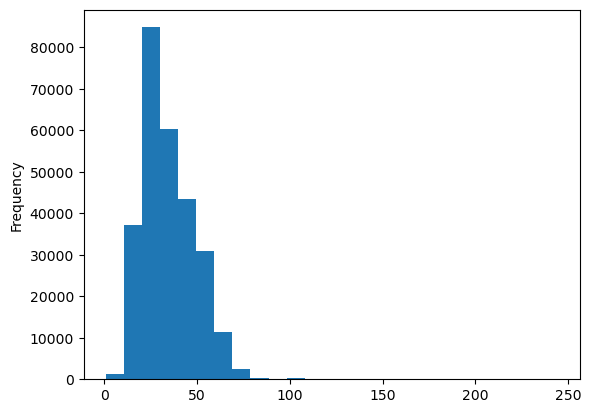

In [126]:
# Plot out the distribution of ages in histogram

df_Users['Age'].plot.hist(bins = 25)


**Observed** Based on the distribution, the ages taper off after 75 years, so I will remove any rows where the age is over 75 to remove the outliers so they don't skew any age-related analysis.

In [127]:
# Count how many rows contain values greater than 75 so can check the work after removal

(df_Users['Age'] > 75).sum()


1537

**Note** As this count is less than 1% of the data, it is safe to remove and should not ruin the integrity of any age-related analysis.

In [128]:
# Remove rows where the value in the "Age" column is greater than 75 then recount

df_Users = df_Users[df_Users['Age'] <= 75]
(df_Users['Age'] > 75).sum()


0

**Confirmed** All outliers in the Age column (any row greater than 75) has been removed

## 03.07 Unclear column headers

In [129]:
# No action needed

## 03.08 Data Profiling Re-checks

In [130]:
# Recheck dimensions of df

df_Users.shape

(271310, 5)

In [131]:
# Reconfirm no missing values

df_Users.isnull().sum()

User-ID             0
Age                 0
Location            0
Country             0
Original Country    0
dtype: int64

In [132]:
# Recheck output - view current column headers and preview

df_Users.head()

,User-ID,Age,Location,Country,Original Country
0,1,25.0,"nyc, new york, usa",United States of America,usa
1,2,18.0,"stockton, california, usa",United States of America,usa
2,3,41.0,"moscow, yukon territory, russia",Russia,russia
3,4,17.0,"porto, v.n.gaia, portugal",Portugal,portugal
4,5,55.0,"farnborough, hants, united kingdom",United Kingdom,united kingdom


In [133]:
# Recheck data types for each column and non-null values

df_Users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271310 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   User-ID           271310 non-null  int64  
 1   Age               271310 non-null  float64
 2   Location          271310 non-null  object 
 3   Country           271310 non-null  object 
 4   Original Country  271310 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 12.4+ MB


In [134]:
# Recheck for any duplicate values in df through a subset

df_dups = df_Users[df_Users.duplicated()]
df_dups

,User-ID,Age,Location,Country,Original Country


**Confirmed** Cleanup complete.

# 04. Data Transformation

- New columns / calculations - none to be made at this point
- Joining or merging tables - not at this point
- Data Profiling Re-checks - N/A

TL;DR: No action needed.

# 05. Export Dataframe

In [135]:
#Export df to Dataset folder as cleaned version

df_Users.to_csv(os.path.join(projpath, '02 Data','Dataset', 'Users-PREPPED.csv'))
